<a href="https://colab.research.google.com/github/DiegoDuran03/1/blob/main/clase5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis of Customer Satisfaction of Merriboy Icecream

In [84]:
path = 'https://raw.githubusercontent.com/tec03/Datasets/main/datasets/satis.csv'

In [85]:
import pandas as pd
import numpy as np

In [86]:
df=pd.read_csv(path)
df.head(2)

,Age,Gender,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Overal satisfaction,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend
0,33.0,Male,Research,">40, 000",5.0,5.0,5.0,4.0,4.0,5.0,...,4.0,4.0,Taste,No,NaN,Combo_VLM,Chocolate,More than one flavoured,agree,agree
1,39.0,Male,student,"<10,000",3.0,5.0,3.0,4.0,5.0,5.0,...,4.0,4.0,Taste,No,Quantity issues,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral


#Descripcion de Base de Datos

Este base de datos nos da informacion de los clientes de nieve Merriboy Icerceam.

In [87]:
df.columns

Index(['Age', 'Gender', 'Ocupation', 'Monthly income', 'Price', 'Quality',
       'Quantity', 'Availability', 'Taste', 'Flavours', 'Customer relation',
       'Customer services', 'Texture', 'Size', 'Overal satisfaction',
       'Consistency', 'Factor', 'Frowned', 'reason', 'Popular', 'My favorite',
       'Kind', 'Preference', 'Recommend'],
      dtype='object')

#Des. de las Variables
- 'Age': Es la variable que nos da la edad de cada cliente. Esta es una variable numerica.
- 'Gender': Variable categorica.
- 'Ocupation': Variable categorica.

In [88]:
df.isnull().any()

,0
Age,True
Gender,True
Ocupation,True
Monthly income,True
Price,True
Quality,True
Quantity,True
Availability,True
Taste,True
Flavours,True


In [89]:
df.isnull().any(axis=1)

,0
0,True
1,False
2,True
3,True
4,True
5,False
6,False
7,True
8,False
9,True


In [90]:
df.isnull().sum(axis=1)

,0
0,1
1,0
2,1
3,1
4,1
5,0
6,0
7,1
8,0
9,1


In [91]:
df.shape

(55, 24)

In [92]:
df.dropna(how='all',axis=0,inplace=True) #eliminar todos RENGLONES si todos datos perdidos
df.dropna(how='all',axis=1,inplace=True) #Eliminar todas las COLUMNAS si todos datos perdidos
df.tail(2)

,Age,Gender,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Overal satisfaction,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend
48,21.0,Male,Nothing,"<10,000",3.0,3.0,3.0,2.0,4.0,3.0,...,3.0,2.0,Taste,No,Quality issues,Combo_VCS,Vanila,More than one flavoured,agree,agree
49,21.0,Male,Engineer,"<10,000",5.0,5.0,4.0,5.0,5.0,5.0,...,5.0,5.0,Quality,Yes,Texture defect,Combo_CRC,Vanila,More than one flavoured,agree,Strongly agree


In [93]:
df.isnull().sum(1)

,0
0,1
1,0
2,1
3,1
4,1
5,0
6,0
7,1
8,0
9,1


In [94]:
df.drop('reason',axis=1,inplace=True)
df.head(2)

,Age,Gender,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Size,Overal satisfaction,Consistency,Factor,Frowned,Popular,My favorite,Kind,Preference,Recommend
0,33.0,Male,Research,">40, 000",5.0,5.0,5.0,4.0,4.0,5.0,...,4.0,4.0,4.0,Taste,No,Combo_VLM,Chocolate,More than one flavoured,agree,agree
1,39.0,Male,student,"<10,000",3.0,5.0,3.0,4.0,5.0,5.0,...,2.0,4.0,4.0,Taste,No,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral


In [95]:
df.columns

Index(['Age', 'Gender', 'Ocupation', 'Monthly income', 'Price', 'Quality',
       'Quantity', 'Availability', 'Taste', 'Flavours', 'Customer relation',
       'Customer services', 'Texture', 'Size', 'Overal satisfaction',
       'Consistency', 'Factor', 'Frowned', 'Popular', 'My favorite', 'Kind',
       'Preference', 'Recommend'],
      dtype='object')

In [96]:
df.shape

(50, 23)

In [97]:
df.isnull().any().sum ()

0

In [98]:
df.Age

,Age
0,33.0
1,39.0
2,40.0
3,27.0
4,23.0
5,27.0
6,48.0
7,15.0
8,28.0
9,24.0


In [99]:
df['Age']=df['Age'].astype(int)
df.Age

,Age
0,33
1,39
2,40
3,27
4,23
5,27
6,48
7,15
8,28
9,24


In [100]:
def cus_cls(x):
  if (0<=x<20):
    return '<=20'
  elif (21<=x<30):
    return '21-30'
  elif (31<=x<40):
    return '31-40'
  return '>=41'

In [101]:
cus_cls(20)

'>=41'

In [102]:
df['AgeGP']=df.apply(lambda eje: cus_cls(eje['Age']),
                     axis=1)
df.head(2)

,Age,Gender,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Overal satisfaction,Consistency,Factor,Frowned,Popular,My favorite,Kind,Preference,Recommend,AgeGP
0,33,Male,Research,">40, 000",5.0,5.0,5.0,4.0,4.0,5.0,...,4.0,4.0,Taste,No,Combo_VLM,Chocolate,More than one flavoured,agree,agree,31-40
1,39,Male,student,"<10,000",3.0,5.0,3.0,4.0,5.0,5.0,...,4.0,4.0,Taste,No,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral,31-40


##1. En que age group tiene mas clientes/ Cual seria el impacto de Age group in ventas?

In [103]:
age_gp_counts = pd.pivot_table(df,
                 index='AgeGP',
                aggfunc='count',
                values='Age')
age_gp_counts

,Age
AgeGP,
21-30,27
31-40,6
<=20,8
>=41,9


In [104]:
age_gp_counts.rename(columns={'Age':'count_ageGP'},inplace=True)
age_gp_counts

,count_ageGP
AgeGP,
21-30,27
31-40,6
<=20,8
>=41,9


In [105]:
age_gp_counts.index

Index(['21-30', '31-40', '<=20', '>=41'], dtype='object', name='AgeGP')

In [106]:
age_gp_counts=age_gp_counts.reindex(['<=20','21-30','31-40','>=41'])
age_gp_counts

,count_ageGP
AgeGP,
<=20,8
21-30,27
31-40,6
>=41,9


In [107]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

<Axes: ylabel='count_ageGP'>

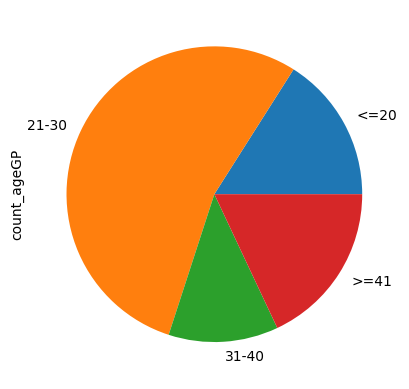

In [108]:
age_gp_counts['count_ageGP'].plot(kind='pie')

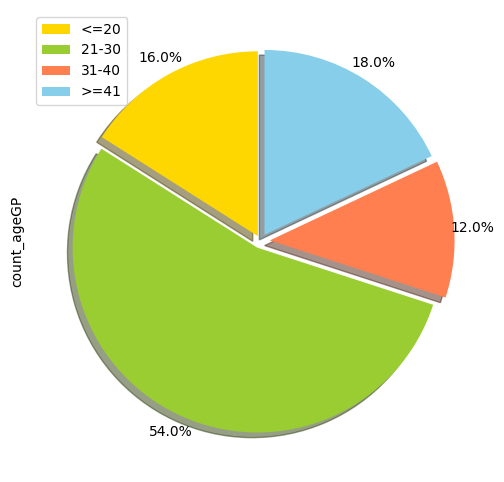

In [109]:
color_list = ['gold','yellowgreen','coral','skyblue','lightgreen']
exp_list = [0.03,0.04,0.05,0.04]
age_gp_counts['count_ageGP'].plot(kind='pie',
                                  colors = color_list,
                                  explode = exp_list,
                                  figsize = (15,6),
                                  autopct='%1.1f%%',
                                  pctdistance = 1.1,
                                  labels = None,
                                  shadow = True,
                                  startangle =90)
plt.legend(labels = age_gp_counts.index)

##Conclusion

La mayoria de los clientes de group de 21-30